In [21]:
import pandas as pd

Users = pd.read_excel('EVIO_history_01-02-2023_29-02-2024.xlsx')
Users = Users.drop(columns=['Start date', 'Stop date', 'Charging Place'])
print(Users)

       Charging Station  Duration (min)  Total Energy (kWh) Nº cartão EVIO
0     CAP_SON_MAI_00004         114.433               6.950            150
1     CAP_SON_MAI_00002          39.483              19.950            144
2     CAP_SON_MAI_00002          30.283              42.030            133
3     CAP_SON_MAI_00010         352.383               8.730             13
4     CAP_SON_MAI_00010           0.400               0.010             13
...                 ...             ...                 ...            ...
1768  CAP_SON_MAI_00003         211.817              11.955             50
1769  CAP_SON_MAI_00001         294.617               9.220              -
1770  CAP_SON_MAI_00004         162.833               8.990             76
1771  CAP_SON_MAI_00004         232.767              41.440             29
1772  CAP_SON_MAI_00004           1.017               0.040             29

[1773 rows x 4 columns]


In [22]:
import pandas as pd

# Carregar o dataset
df = pd.read_excel('EVIO_history_01-02-2023_29-02-2024.xlsx')
df = df.drop(columns=['Charging Place']) 
print(df)


# Converter as colunas de datas para o tipo datetime
df['Start date'] = pd.to_datetime(df['Start date'], format='%m/%d/%Y | %H:%M')
df['Stop date'] = pd.to_datetime(df['Stop date'], format='%m/%d/%Y | %H:%M')
# Converter colunas para tipos apropriados
df['Duration (min)'] = pd.to_numeric(df['Duration (min)'], errors='coerce')
df['Total Energy (kWh)'] = pd.to_numeric(df['Total Energy (kWh)'], errors='coerce')
df['Nº cartão EVIO'] = df['Nº cartão EVIO'].replace('-', pd.NA)
df['Nº cartão EVIO'] = pd.to_numeric(df['Nº cartão EVIO'], errors='coerce')


# 1. Dias de carregamento mais utilizados para cada usuário
df['dia_da_semana'] = df['Start date'].dt.day_name()
dias_de_carregamento_max = df.groupby('Nº cartão EVIO')['dia_da_semana'].agg(lambda x: x.mode()).reset_index()

# 2. Tempo médio de carregamento para cada usuário
tempo_medio_carregamento = df.groupby('Nº cartão EVIO')['Duration (min)'].mean().reset_index()

# 3. Período do dia mais comum para carregamento para cada usuário
df['periodo_do_dia'] = pd.cut(df['Start date'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Madrugada', 'Manhã', 'Tarde', 'Noite'])
periodo_do_dia_mais_comum = df.groupby(['Nº cartão EVIO', 'periodo_do_dia']).size().reset_index(name='quantidade_de_carregamentos')
periodo_do_dia_mais_comum = periodo_do_dia_mais_comum.loc[periodo_do_dia_mais_comum.groupby('Nº cartão EVIO')['quantidade_de_carregamentos'].idxmax()]

# Resultados
print("Dias de carregamento mais utilizados para cada usuário:")
print(dias_de_carregamento_max)

print("\nTempo médio de carregamento para cada usuário:")
print(tempo_medio_carregamento)

print("\nPeríodo do dia mais comum para carregamento para cada usuário:")
print(periodo_do_dia_mais_comum)


              Start date           Stop date   Charging Station  \
0     02/29/2024 | 14:17  02/29/2024 | 16:12  CAP_SON_MAI_00004   
1     02/29/2024 | 10:44  02/29/2024 | 11:24  CAP_SON_MAI_00002   
2     02/29/2024 | 09:42  02/29/2024 | 10:12  CAP_SON_MAI_00002   
3     02/29/2024 | 09:02  02/29/2024 | 14:55  CAP_SON_MAI_00010   
4     02/29/2024 | 09:00  02/29/2024 | 09:01  CAP_SON_MAI_00010   
...                  ...                 ...                ...   
1768  02/01/2023 | 14:11  02/01/2023 | 17:43  CAP_SON_MAI_00003   
1769  02/01/2023 | 09:00  02/01/2023 | 13:54  CAP_SON_MAI_00001   
1770  02/01/2023 | 08:55  02/01/2023 | 11:38  CAP_SON_MAI_00004   
1771  02/01/2023 | 08:50  02/01/2023 | 12:42  CAP_SON_MAI_00004   
1772  02/01/2023 | 08:48  02/01/2023 | 08:49  CAP_SON_MAI_00004   

      Duration (min)  Total Energy (kWh) Nº cartão EVIO  
0            114.433               6.950            150  
1             39.483              19.950            144  
2             30.283 

In [27]:
#print(df.head())

# Converter a coluna 'Nº cartão EVIO' para numérica
df['Nº cartão EVIO'] = pd.to_numeric(df['Nº cartão EVIO'], errors='coerce')

# Calcular estatísticas descritivas para cada usuário
estatisticas_por_usuario = df.groupby('Nº cartão EVIO').describe()

# Exibir as estatísticas descritivas para cada usuário
print("Estatísticas Descritivas para cada Usuário:")
print(estatisticas_por_usuario)

Estatísticas Descritivas para cada Usuário:
               Duration (min)                                               \
                        count         mean          std     min        25%   
Nº cartão EVIO                                                               
0.0                     125.0   227.200944   367.745378   0.300   46.76700   
1.0                      82.0   476.340451   989.553403   0.067  146.85000   
4.0                      94.0   208.098394   113.569806   0.083  160.58750   
5.0                      58.0   647.457414  2654.457677   0.067  206.99150   
13.0                     29.0   207.124103   139.011777   0.167  131.78300   
19.0                     65.0   180.458692   201.004283   0.050   93.11700   
29.0                    112.0   196.461589   406.078775   0.067   30.38725   
30.0                     20.0     0.183300     0.089122   0.033    0.14575   
35.0                     66.0   194.631136    97.561475   0.100  171.02475   
46.0                

"# Obter números de cartão únicos\nunique_evio_cards = Users['Nº cartão EVIO'].unique()\n\n# Iterar sobre os números de cartão únicos\nfor evio_card in unique_evio_cards:\n    # Filtrar os dados para o número de cartão atual\n    data_for_card = df[df['Nº cartão EVIO'] == evio_card]\n    print(df.describe())"

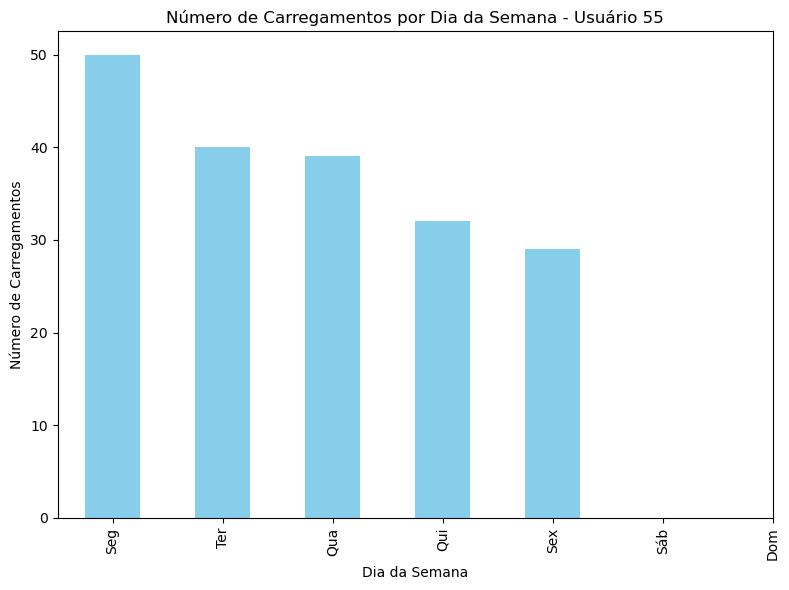

In [38]:
# Filtrar o DataFrame para os carregamentos do usuário 55
df_usuario_55 = df[df['Nº cartão EVIO'] == 55]

# Calcular o número de carregamentos em cada dia da semana para o usuário 55
num_carregamentos_por_dia_usuario_55 = df_usuario_55['dia_da_semana'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
num_carregamentos_por_dia_usuario_55.plot(kind='bar', color='skyblue')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Número de Carregamentos por Dia da Semana - Usuário 55')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


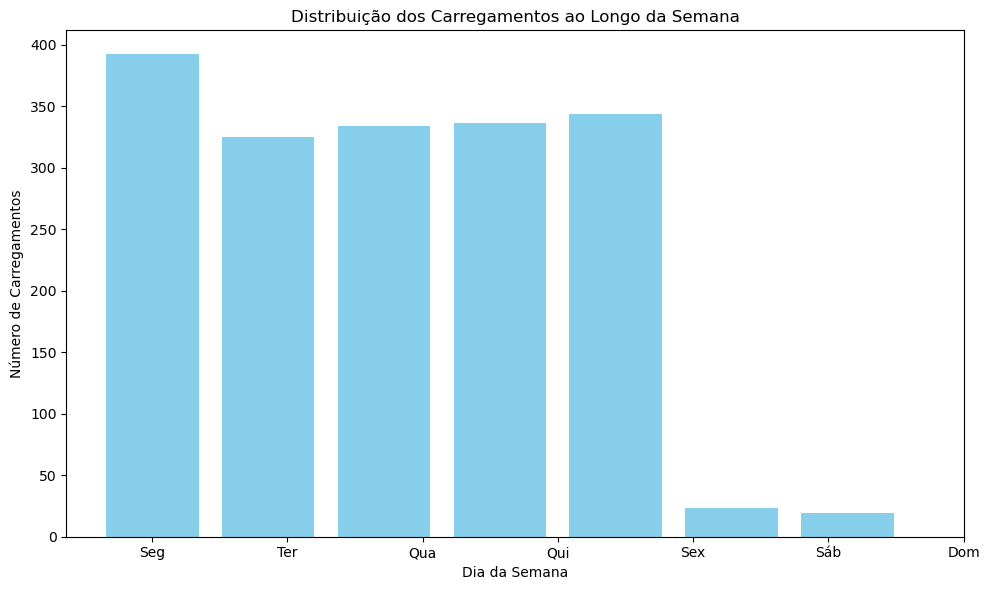

In [29]:
import matplotlib.pyplot as plt

# Converter a coluna 'Start date' para o tipo datetime
df['Start date'] = pd.to_datetime(df['Start date'], format='%m/%d/%Y | %H:%M')

# Extrair o dia da semana (segunda-feira = 0, domingo = 6)
df['dia_da_semana'] = df['Start date'].dt.dayofweek

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['dia_da_semana'], bins=7, align='left', rwidth=0.8, color='skyblue')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Distribuição dos Carregamentos ao Longo da Semana')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()

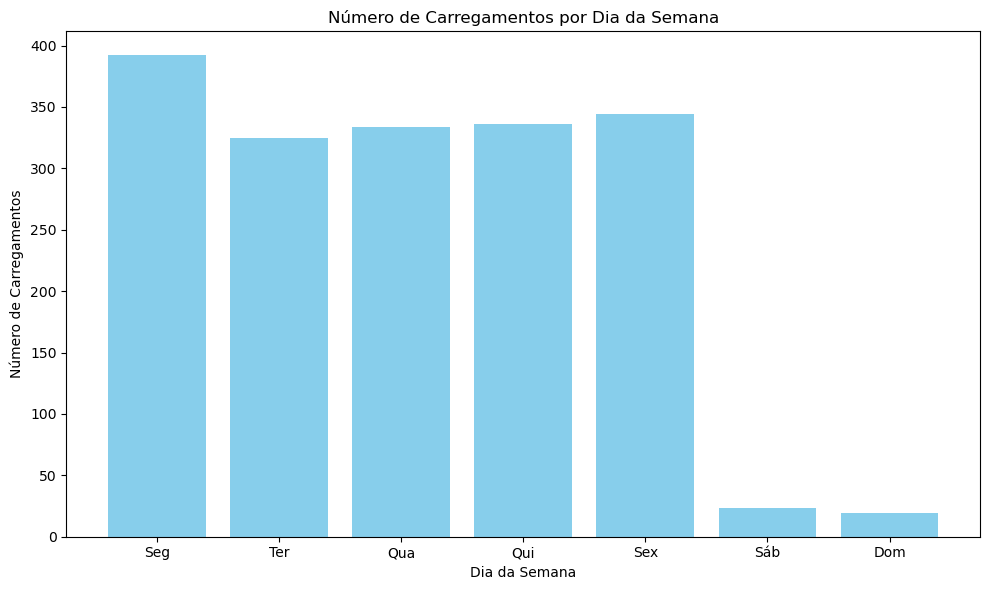

In [30]:
# Converter a coluna 'Start date' para o tipo datetime
df['Start date'] = pd.to_datetime(df['Start date'], format='%m/%d/%Y | %H:%M')

# Extrair o dia da semana (segunda-feira = 0, domingo = 6)
df['dia_da_semana'] = df['Start date'].dt.dayofweek

# Calcular o número de carregamentos para cada dia da semana
num_carregamentos_por_dia = df['dia_da_semana'].value_counts().sort_index()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.bar(num_carregamentos_por_dia.index, num_carregamentos_por_dia.values, color='skyblue')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Número de Carregamentos por Dia da Semana')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


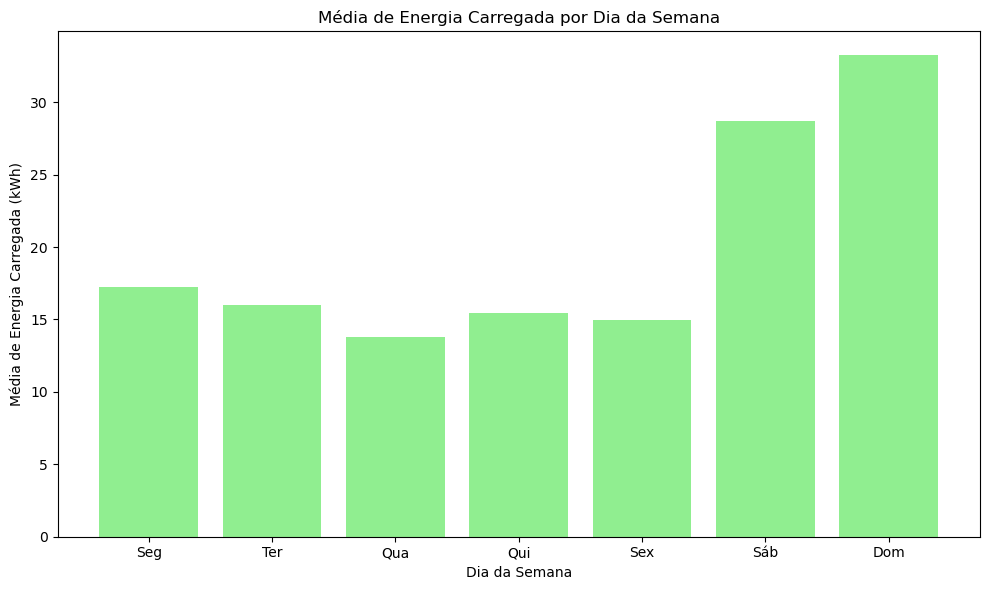

In [31]:
# Calcular a média da energia carregada em cada dia da semana
media_energia_por_dia = df.groupby('dia_da_semana')['Total Energy (kWh)'].mean()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.bar(media_energia_por_dia.index, media_energia_por_dia.values, color='lightgreen')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Energia Carregada (kWh)')
plt.title('Média de Energia Carregada por Dia da Semana')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


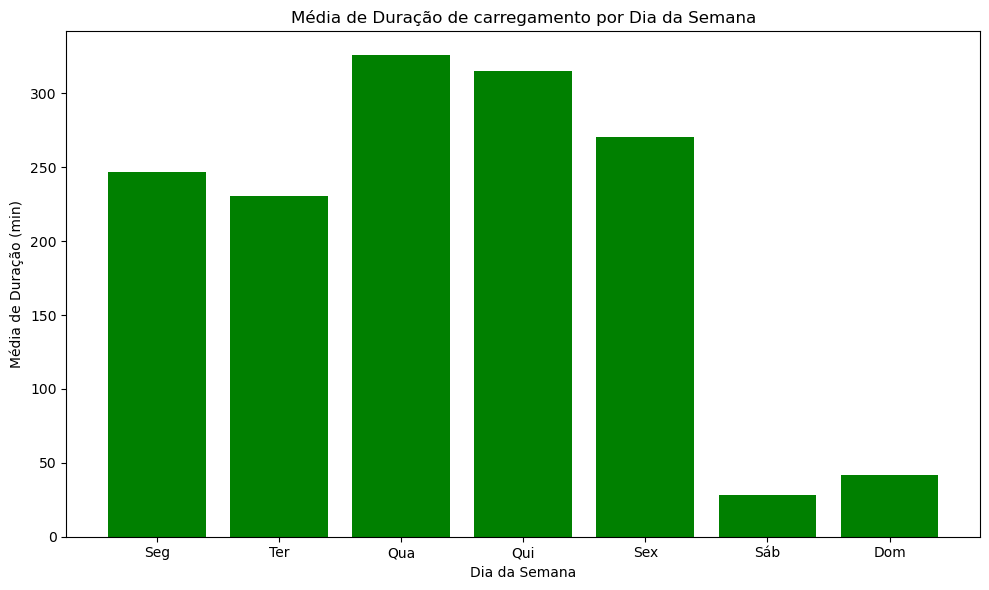

In [35]:
# Calcular a média da energia carregada em cada dia da semana
media_energia_por_dia = df.groupby('dia_da_semana')['Duration (min)'].mean()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.bar(media_energia_por_dia.index, media_energia_por_dia.values, color='green')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Duração (min)')
plt.title('Média de Duração de carregamento por Dia da Semana')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.tight_layout()
plt.show()


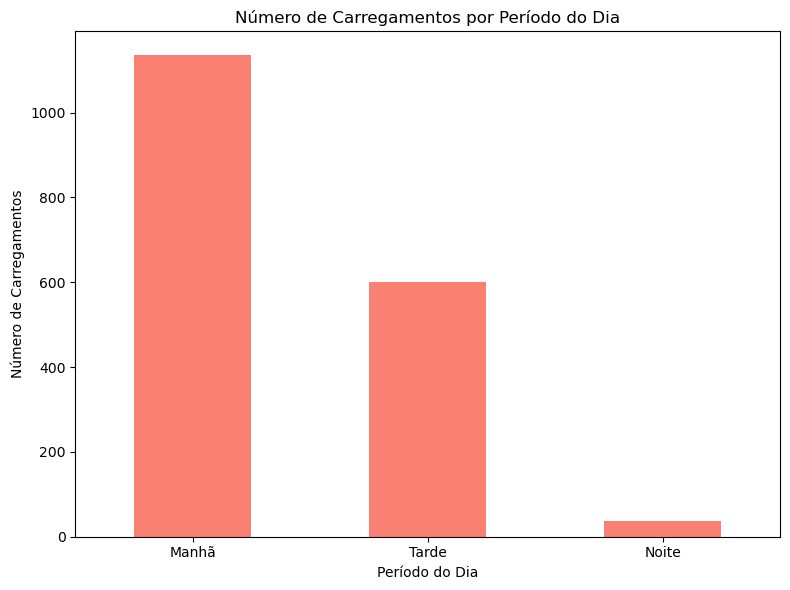

In [37]:
# Criar uma função para mapear as horas para períodos do dia
def periodo_do_dia(hora):
    if hora < 6:
        return 'Noite'
    elif hora < 12:
        return 'Manhã'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Aplicar a função para criar uma nova coluna 'periodo_do_dia'
df['periodo_do_dia'] = df['Start date'].dt.hour.apply(periodo_do_dia)

# Calcular o número de carregamentos para cada período do dia
num_carregamentos_por_periodo = df['periodo_do_dia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
num_carregamentos_por_periodo.plot(kind='bar', color='salmon')
plt.xlabel('Período do Dia')
plt.ylabel('Número de Carregamentos')
plt.title('Número de Carregamentos por Período do Dia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
# Calcular a média da energia carregada de cada usuário para cada dia da semana
media_energia_carregada = df.groupby(['Nº cartão EVIO', 'dia_da_semana'])['Total Energy (kWh)'].mean().reset_index()

# Pivotar os dados para que cada usuário seja uma coluna e os dias da semana sejam índices
media_energia_carregada_pivot = media_energia_carregada.pivot(index='dia_da_semana', columns='Nº cartão EVIO', values='Total Energy (kWh)')

# Exibir a tabela
print("Média da Energia Carregada de cada Usuário para Cada Dia da Semana:")
print(media_energia_carregada_pivot)


Média da Energia Carregada de cada Usuário para Cada Dia da Semana:
Nº cartão EVIO      0.0        1.0       4.0        5.0        13.0   \
dia_da_semana                                                          
Friday          27.904400  15.125571  8.603118  11.596000   7.229857   
Monday          33.365615  20.354773  9.046806   9.111111  11.660750   
Saturday        30.510000        NaN       NaN        NaN        NaN   
Sunday          34.811111        NaN       NaN        NaN        NaN   
Thursday        25.186556  21.104917  9.320706   9.765000   4.438333   
Tuesday         23.248250  19.679538  8.186563   8.193182   8.724800   
Wednesday       30.383857  17.376714  7.906923  10.076545   7.392143   

Nº cartão EVIO     19.0       29.0    30.0       35.0       46.0   ...  \
dia_da_semana                                                      ...   
Friday          8.016000  25.813389  0.0100   9.516000   9.184714  ...   
Monday          7.989474  29.654037  0.0054  10.344556  10.62

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_64088\3544735553.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


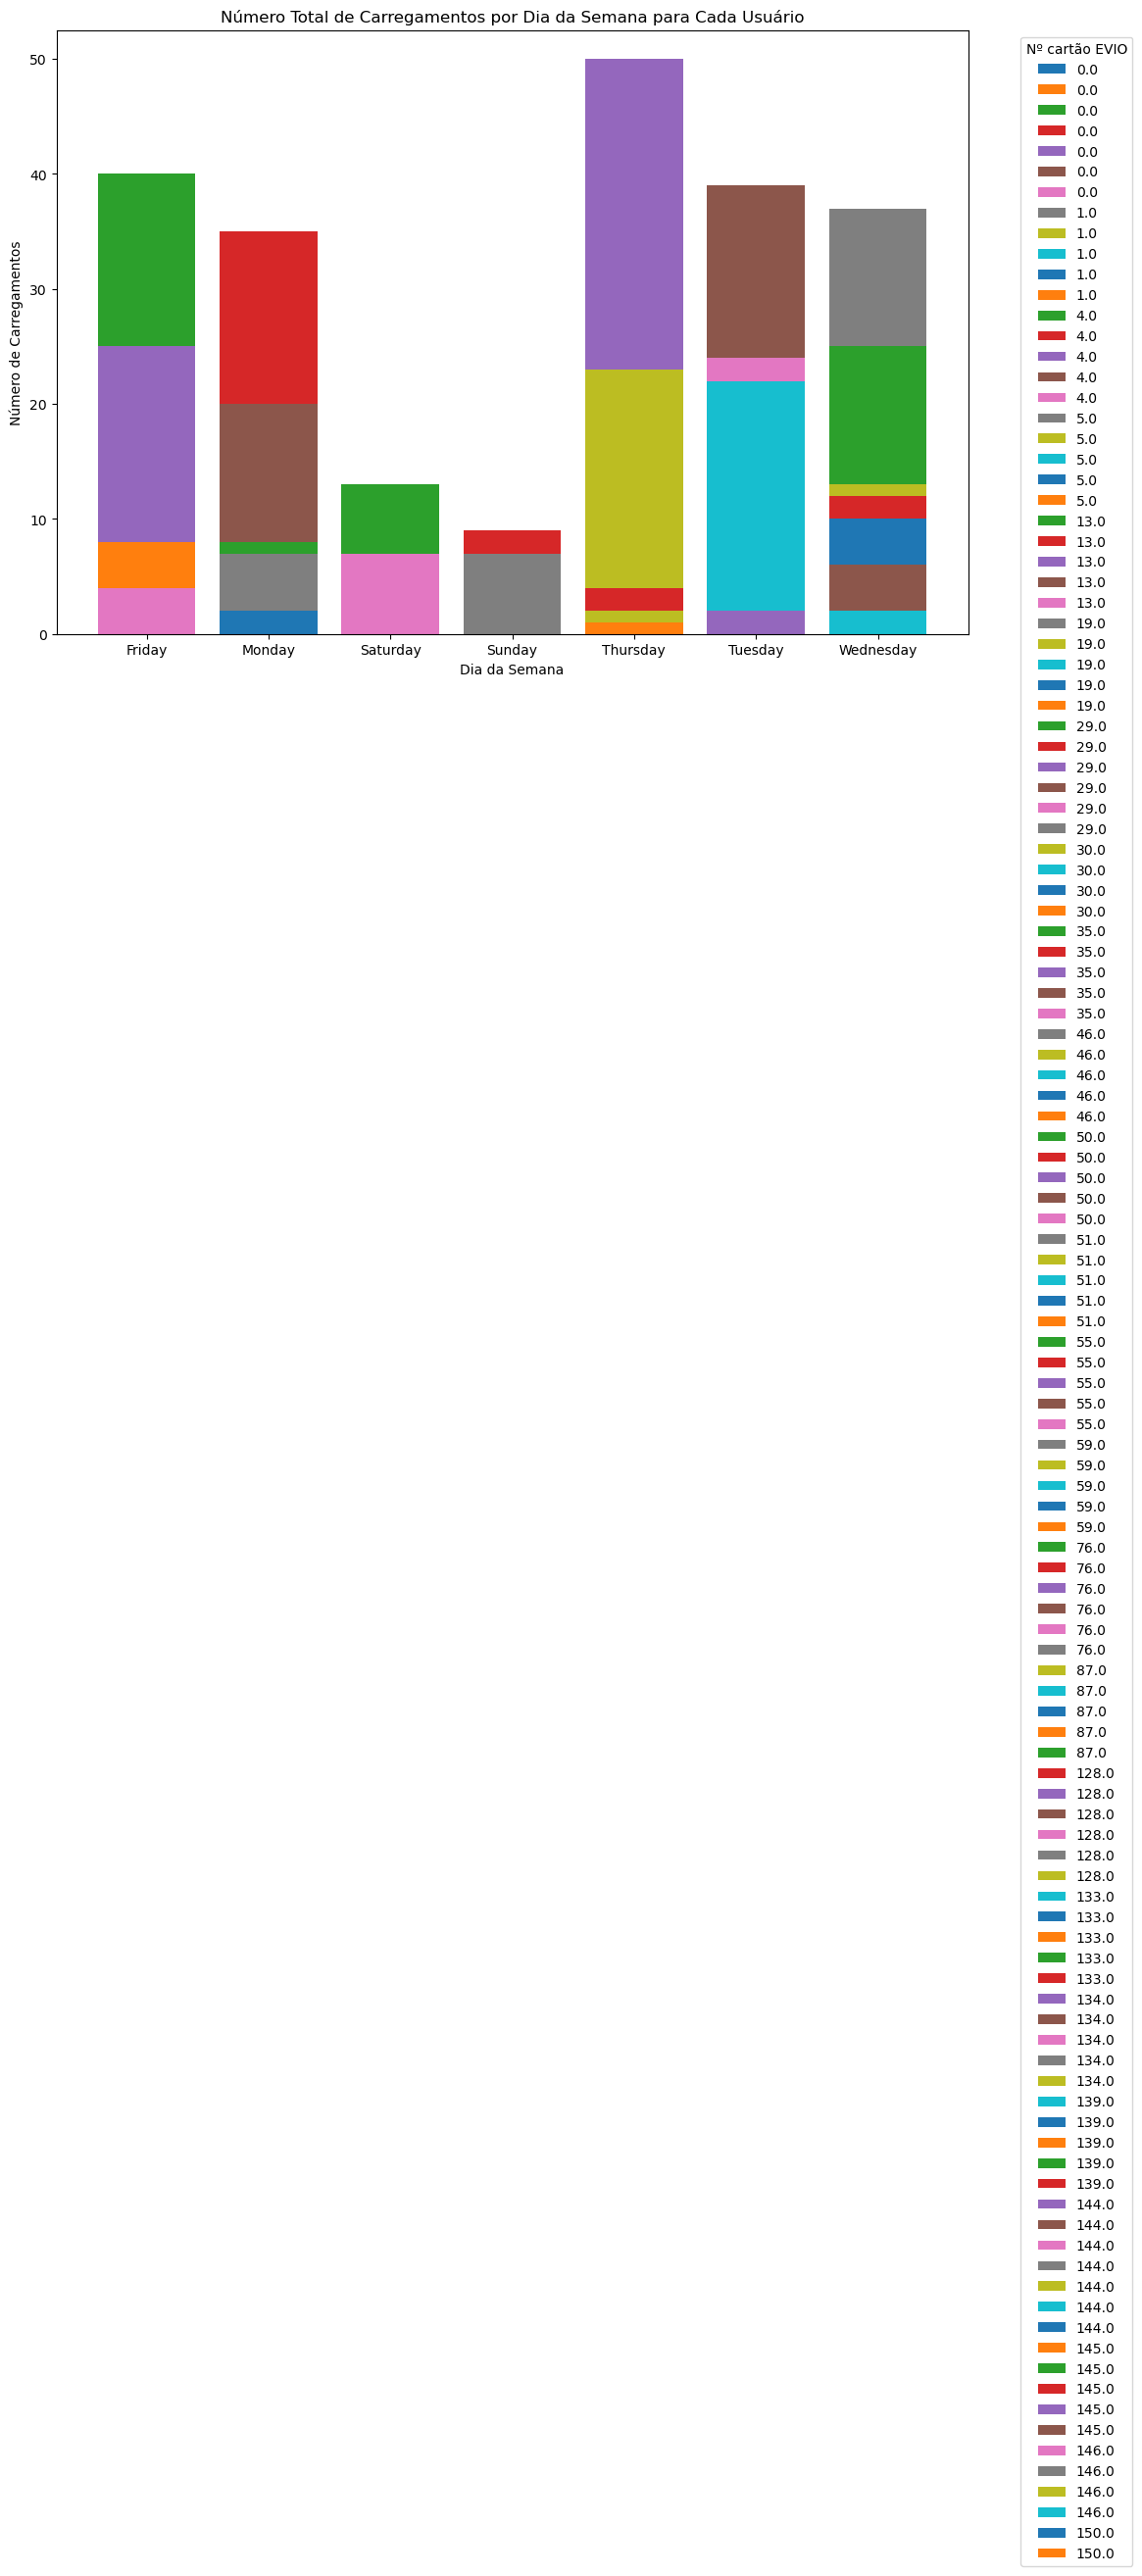

In [15]:
import matplotlib.pyplot as plt

# Calcular a contagem total de carregamentos para cada dia da semana para cada usuário
dias_de_carregamento_total = df.groupby(['Nº cartão EVIO', 'dia_da_semana']).size().reset_index(name='quantidade_de_carregamentos')

# Criar gráfico de barras para os dias de carregamento mais utilizados para cada usuário
plt.figure(figsize=(12, 8))
for i, row in dias_de_carregamento_total.iterrows():
    plt.bar(row['dia_da_semana'], row['quantidade_de_carregamentos'], label=row['Nº cartão EVIO'])

plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Número Total de Carregamentos por Dia da Semana para Cada Usuário')
plt.legend(title='Nº cartão EVIO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_64088\1838221914.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(ordem_dias_semana)
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_64088\1838221914.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


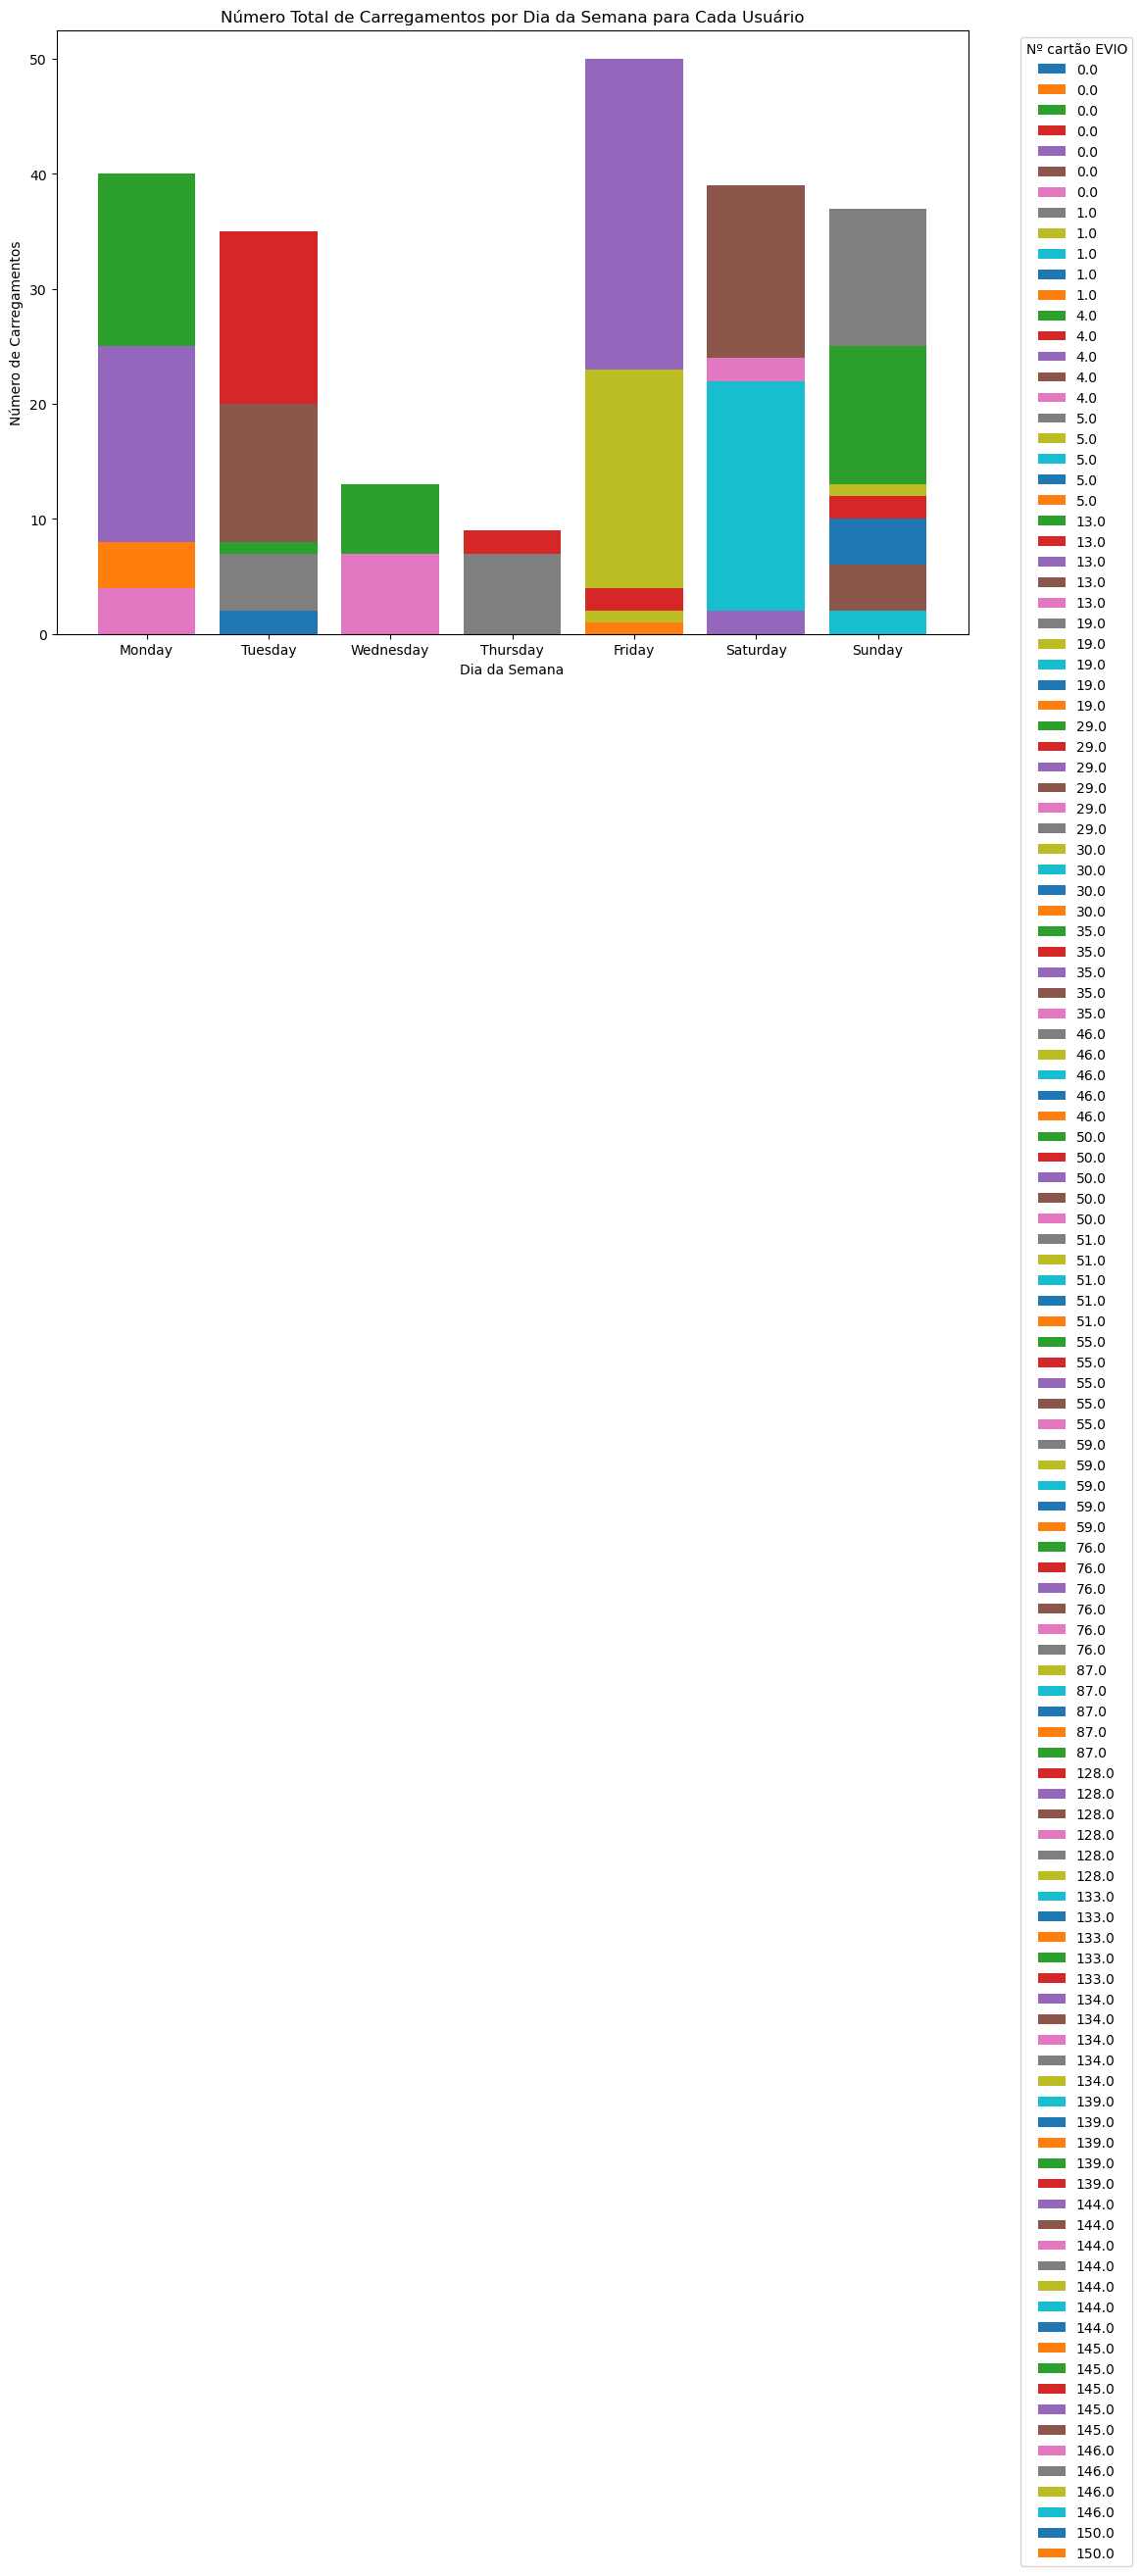

In [14]:
import matplotlib.pyplot as plt

# Definir a ordem dos dias da semana
ordem_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calcular a contagem total de carregamentos para cada dia da semana para cada usuário
dias_de_carregamento_total = df.groupby(['Nº cartão EVIO', 'dia_da_semana']).size().reset_index(name='quantidade_de_carregamentos')

# Criar gráfico de barras para os dias de carregamento mais utilizados para cada usuário
plt.figure(figsize=(12, 8))
for i, row in dias_de_carregamento_total.iterrows():
    plt.bar(row['dia_da_semana'], row['quantidade_de_carregamentos'], label=row['Nº cartão EVIO'])

plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Número Total de Carregamentos por Dia da Semana para Cada Usuário')
plt.legend(title='Nº cartão EVIO', bbox_to_anchor=(1.05, 1), loc='upper left')

# Definir a ordem dos dias da semana no gráfico
plt.gca().set_xticklabels(ordem_dias_semana)

plt.tight_layout()
plt.show()


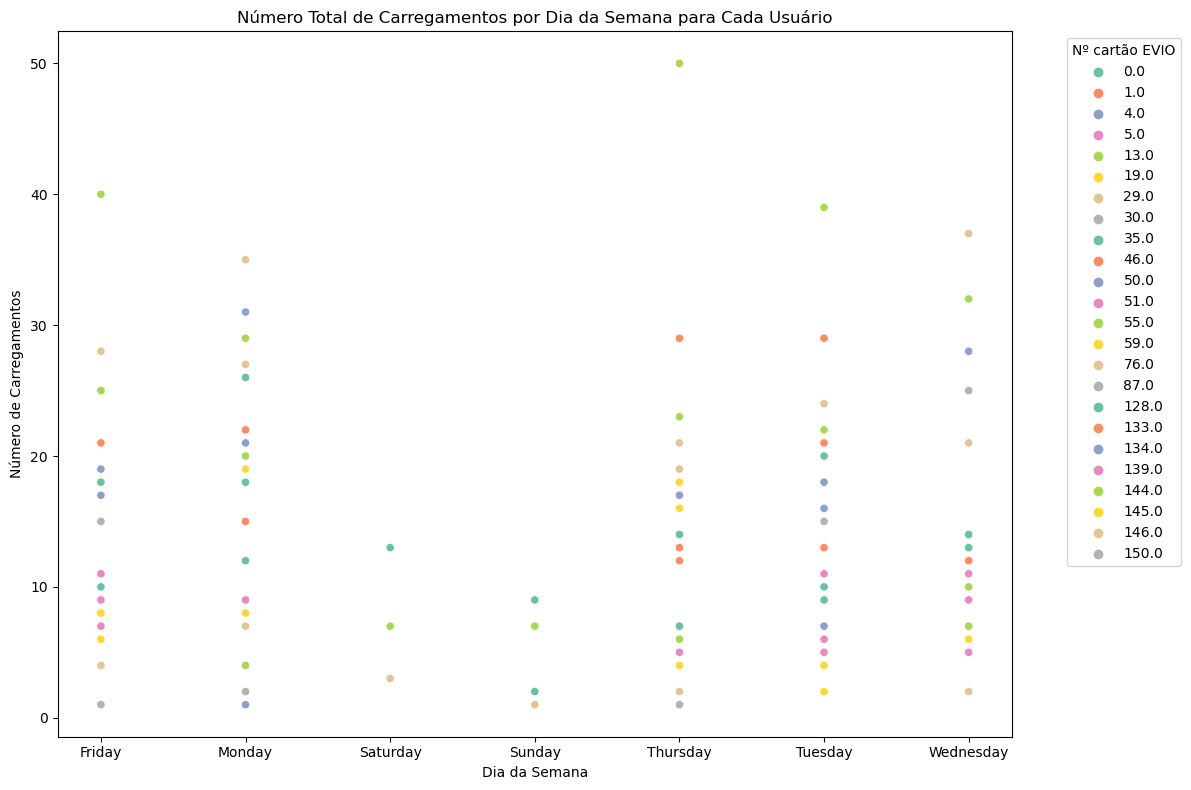

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a contagem total de carregamentos para cada dia da semana para cada usuário
dias_de_carregamento_total = df.groupby(['Nº cartão EVIO', 'dia_da_semana']).size().reset_index(name='quantidade_de_carregamentos')

# Criar gráfico de dispersão para os dias de carregamento mais utilizados para cada usuário
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dias_de_carregamento_total, x='dia_da_semana', y='quantidade_de_carregamentos', hue='Nº cartão EVIO', palette='Set2')

plt.xlabel('Dia da Semana')
plt.ylabel('Número de Carregamentos')
plt.title('Número Total de Carregamentos por Dia da Semana para Cada Usuário')
plt.legend(title='Nº cartão EVIO', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


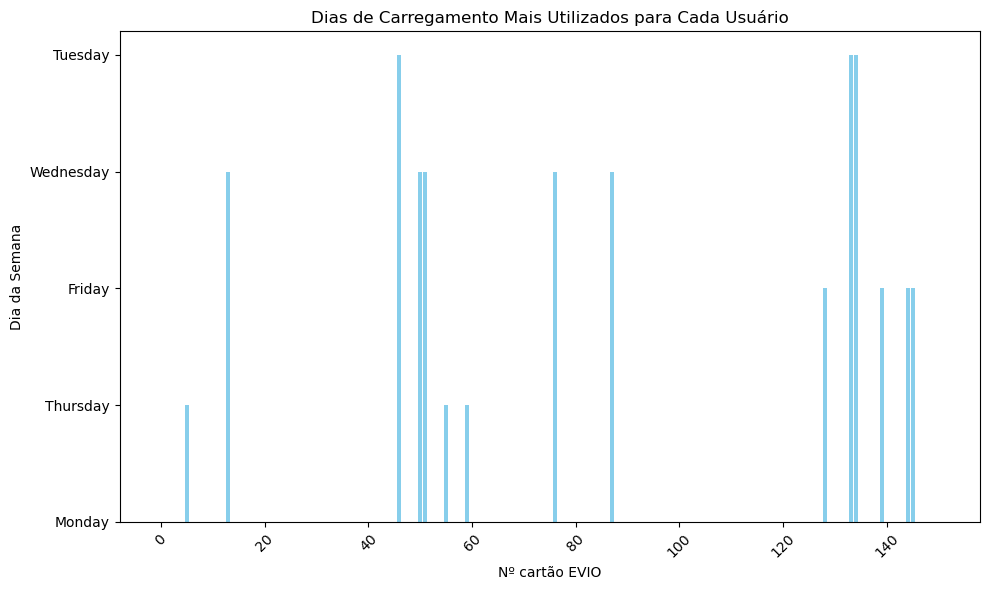

In [10]:
import matplotlib.pyplot as plt

# Criar gráfico de barras para os dias de carregamento mais utilizados para cada usuário
plt.figure(figsize=(10, 6))
for i, row in dias_de_carregamento_max.iterrows():
    plt.bar(row['Nº cartão EVIO'], row['dia_da_semana'], color='skyblue')

plt.xlabel('Nº cartão EVIO')
plt.ylabel('Dia da Semana')
plt.title('Dias de Carregamento Mais Utilizados para Cada Usuário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

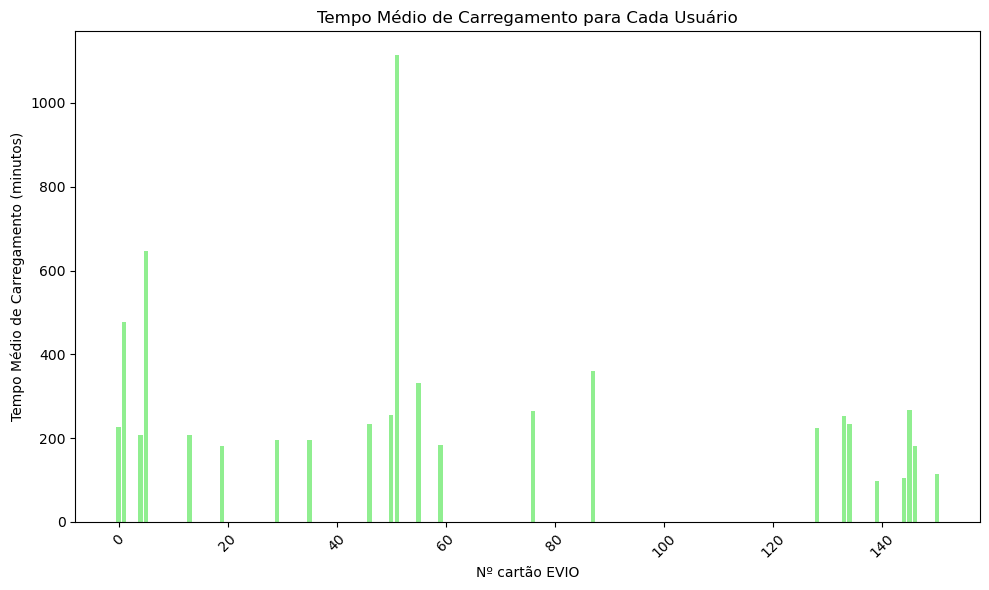

In [11]:
# Criar gráfico de barras para o tempo médio de carregamento para cada usuário
plt.figure(figsize=(10, 6))
plt.bar(tempo_medio_carregamento['Nº cartão EVIO'], tempo_medio_carregamento['Duration (min)'], color='lightgreen')

plt.xlabel('Nº cartão EVIO')
plt.ylabel('Tempo Médio de Carregamento (minutos)')
plt.title('Tempo Médio de Carregamento para Cada Usuário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

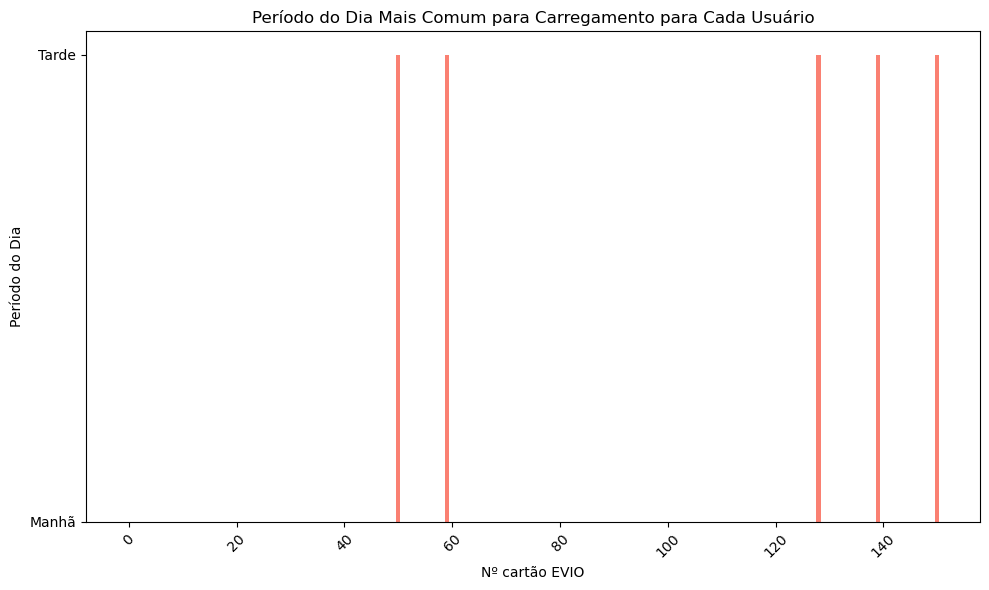

In [12]:
# Criar gráfico de barras para o período do dia mais comum para carregamento para cada usuário
plt.figure(figsize=(10, 6))
for i, row in periodo_do_dia_mais_comum.iterrows():
    plt.bar(row['Nº cartão EVIO'], row['periodo_do_dia'], color='salmon')

plt.xlabel('Nº cartão EVIO')
plt.ylabel('Período do Dia')
plt.title('Período do Dia Mais Comum para Carregamento para Cada Usuário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()